# Coffee Store Sales Analysis

This notebook provides a comprehensive analysis of the Coffee Store Sales dataset. We will explore the data, visualize key patterns, and build machine learning models to forecast sales. The workflow includes data cleaning, exploratory data analysis (EDA), feature engineering, model training, hyperparameter tuning, and interpretation of results.

---


## 1. Import Libraries and Load Data

We start by importing the necessary libraries and loading the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset 
df = pd.read_excel(r"C:\Users\dell\Downloads\Coffee Sales Analysis\Coffe_sales.xlsx")  

df.head()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


## 2. Data Overview and Cleaning

Let's examine the structure of the dataset, check for missing values, duplicates, and data types. We will also clean the data as needed to prepare it for analysis.

In [5]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


In [ ]:
# Check for missing values
print(df.isnull().sum())

date            0
datetime        0
hour_of_day     0
cash_type       0
card           89
money           0
coffee_name     0
Time_of_Day     0
Weekday         0
Month_name      0
Weekdaysort     0
Monthsort       0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')


# Display basic statistics
df.describe()

Number of duplicate rows: 0


,date,datetime,hour_of_day,money,Weekdaysort,Monthsort
count,3636,3636,3636.000000,3636.000000,3636.000000,3636.000000
mean,2024-09-30 11:56:02.376237568,2024-10-01 02:35:30.535053824,14.166942,31.746859,3.847910,6.394664
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,6.000000,18.120000,1.000000,1.000000
25%,2024-07-03 00:00:00,2024-07-03 16:54:06.084750080,10.000000,27.920000,2.000000,3.000000
50%,2024-10-06 12:00:00,2024-10-07 02:55:12.649500160,14.000000,32.820000,4.000000,6.000000
75%,2025-01-08 00:00:00,2025-01-08 07:55:20.299750144,18.000000,35.760000,6.000000,10.000000
max,2025-03-23 00:00:00,2025-03-23 18:11:38.635000,22.000000,40.000000,7.000000,12.000000
std,NaN,NaN,4.227755,4.919926,1.975983,3.480686


## 3. Exploratory Data Analysis (EDA)

In this section, we will perform initial statistical analysis, including summary statistics, distribution of sales, and identification of key trends in the coffee sales data.

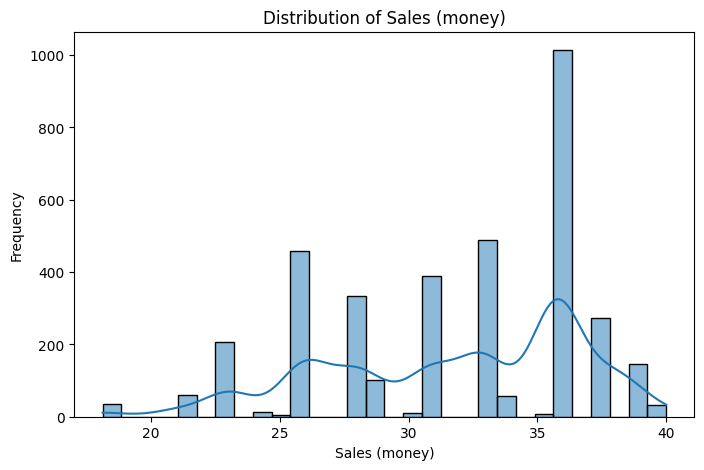

In [ ]:
# Distribution of sales (money)
plt.figure(figsize=(8,5))
sns.histplot(df['money'], bins=30, kde=True)
plt.title('Distribution of Sales (money)')
plt.xlabel('Sales (money)')
plt.ylabel('Frequency')
plt.show()

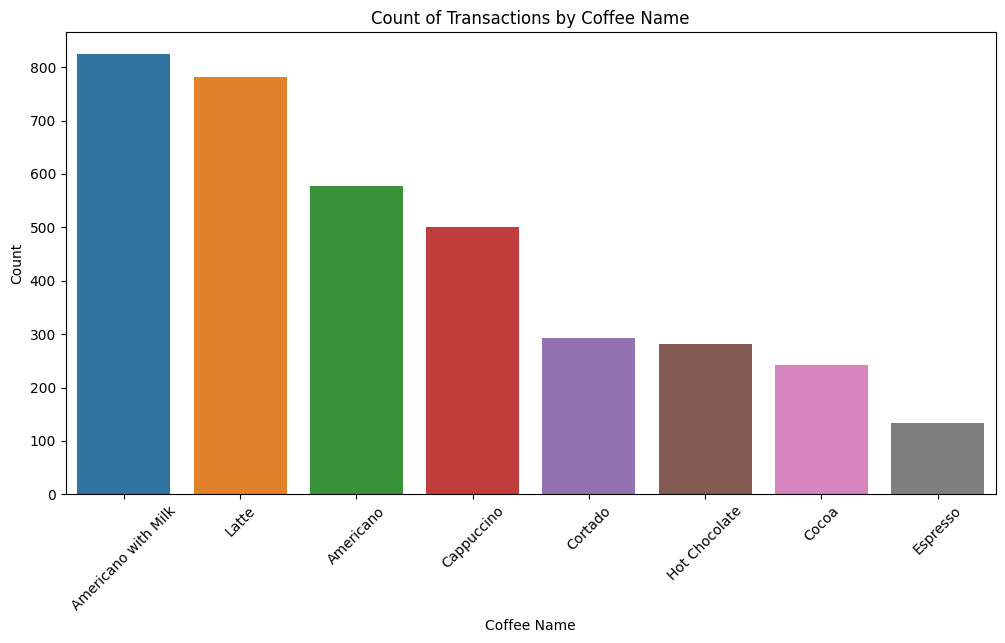

In [ ]:
# Count plot to see the most popular coffees
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title('Count of Transactions by Coffee Name')
plt.xlabel('Coffee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4. Feature Engineering

We will create new features from the existing data that might help with the analysis and modeling, such as extracting the day of week, month, and other time-based features.

In [ ]:
# Convert 'date' and 'datetime' columns to datetime 
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Drop rows where conversion failed if necessary
df = df.dropna(subset=['date', 'datetime'])

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Additional cleaning
categorical_cols = ['cash_type', 'card', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()
    
# Feature engineering: extract year, month, day, weekday, hour
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

In [ ]:
df.head()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,year,month,day,weekday
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3,2024,3,1,4
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024,3,1,4
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024,3,1,4
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3,2024,3,1,4
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3,2024,3,1,4


## 5. Visualization of Sales Patterns

Let's visualize sales patterns across different dimensions such as product categories, store locations, and time periods.

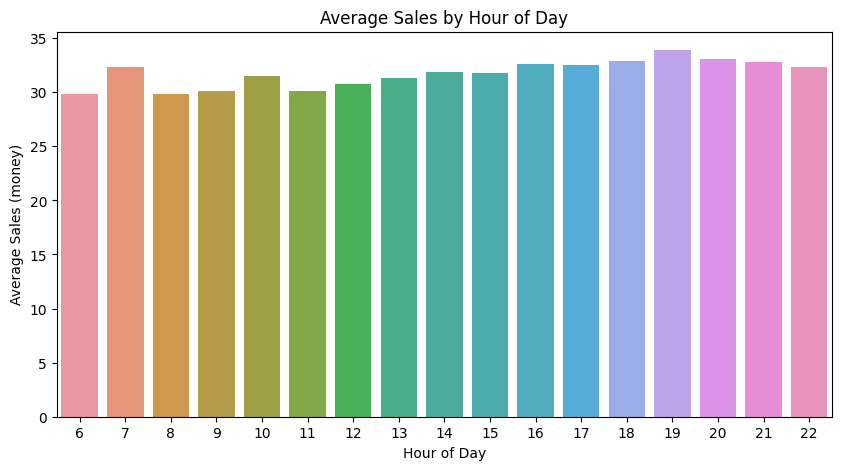

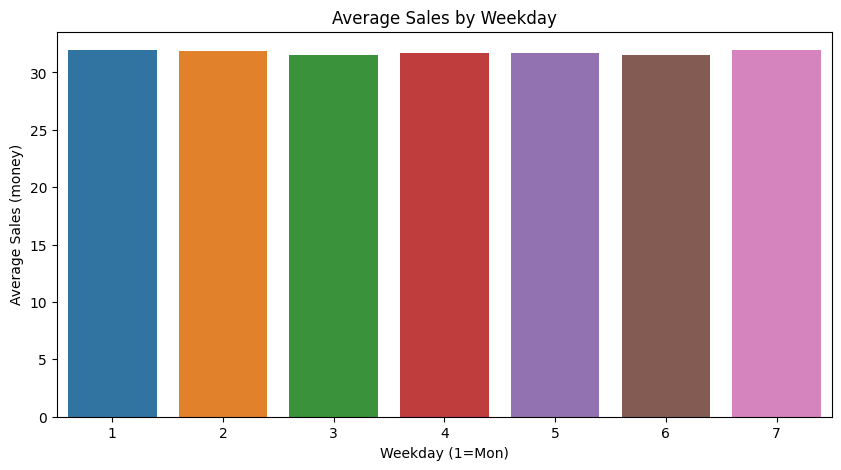

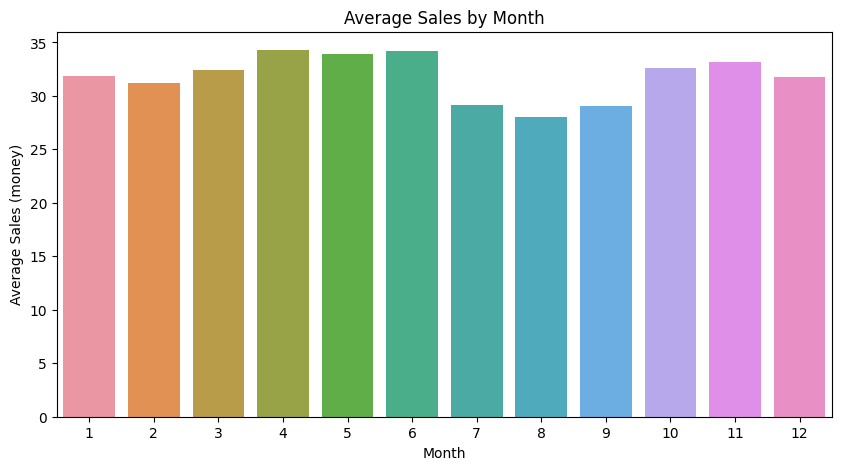

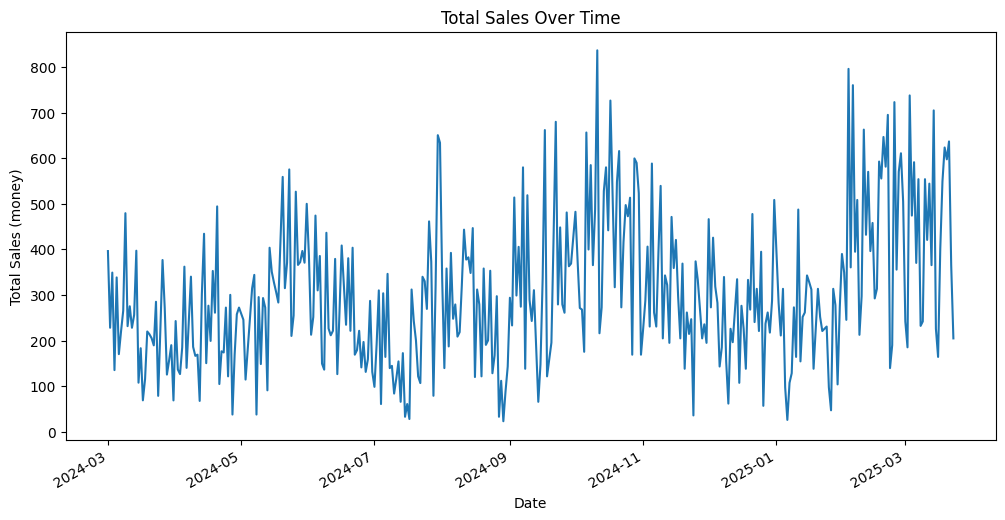

In [ ]:
# Sales by hour of day
plt.figure(figsize=(10,5))
sns.barplot(x='hour_of_day', y='money', data=df, estimator=np.mean, ci=None)
plt.title('Average Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales (money)')
plt.show()

# Sales by weekday
plt.figure(figsize=(10,5))
sns.barplot(x='Weekdaysort', y='money', data=df, estimator=np.mean, ci=None)
plt.title('Average Sales by Weekday')
plt.xlabel('Weekday (1=Mon)')
plt.ylabel('Average Sales (money)')
plt.show()

# Sales by month
plt.figure(figsize=(10,5))
sns.barplot(x='Monthsort', y='money', data=df, estimator=np.mean, ci=None)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales (money)')
plt.show()

# Sales over time
plt.figure(figsize=(12,6))
df.groupby('date')['money'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (money)')
plt.show()

## 6. Time Series Analysis

We will analyze sales trends over time, identify seasonality, trends, and cyclic patterns in the coffee sales data using time series decomposition and visualization techniques.

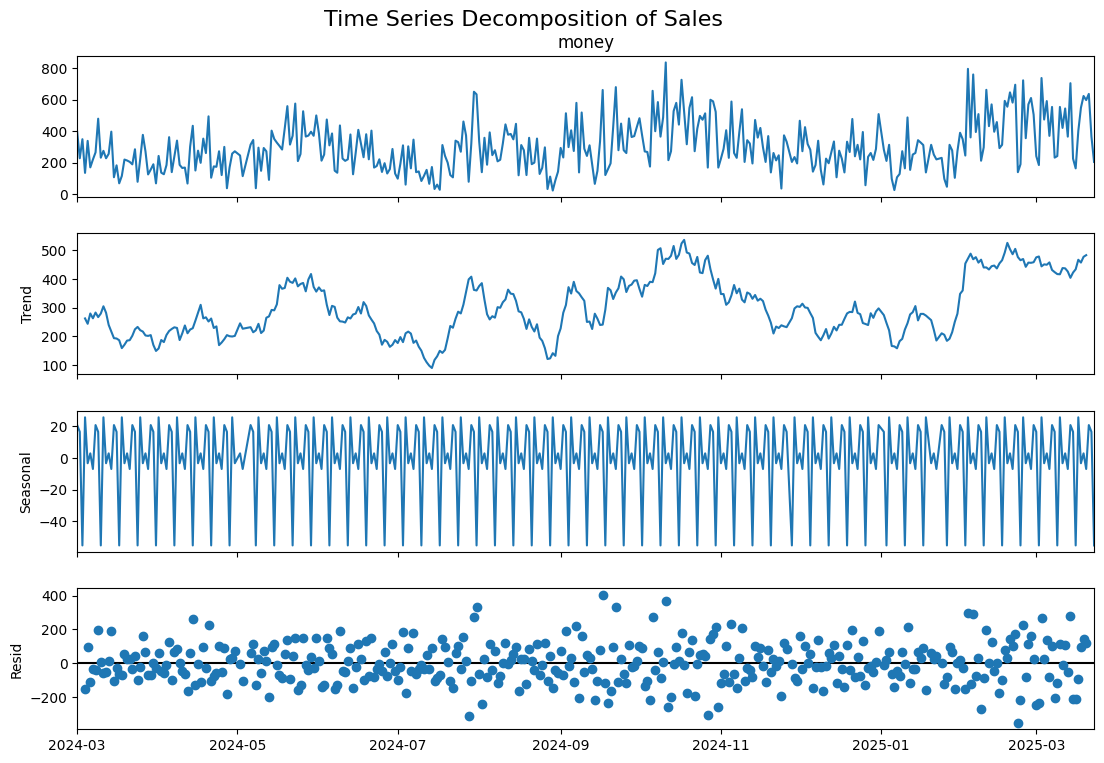

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate sales by date
daily_sales = df.groupby('date')['money'].sum()

# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_sales, model='additive', period=7)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Time Series Decomposition of Sales', fontsize=16)
plt.show()

## 7. Correlation Analysis

Let's examine relationships between different variables in the dataset using correlation matrices and visualizations to understand which factors influence sales most strongly.

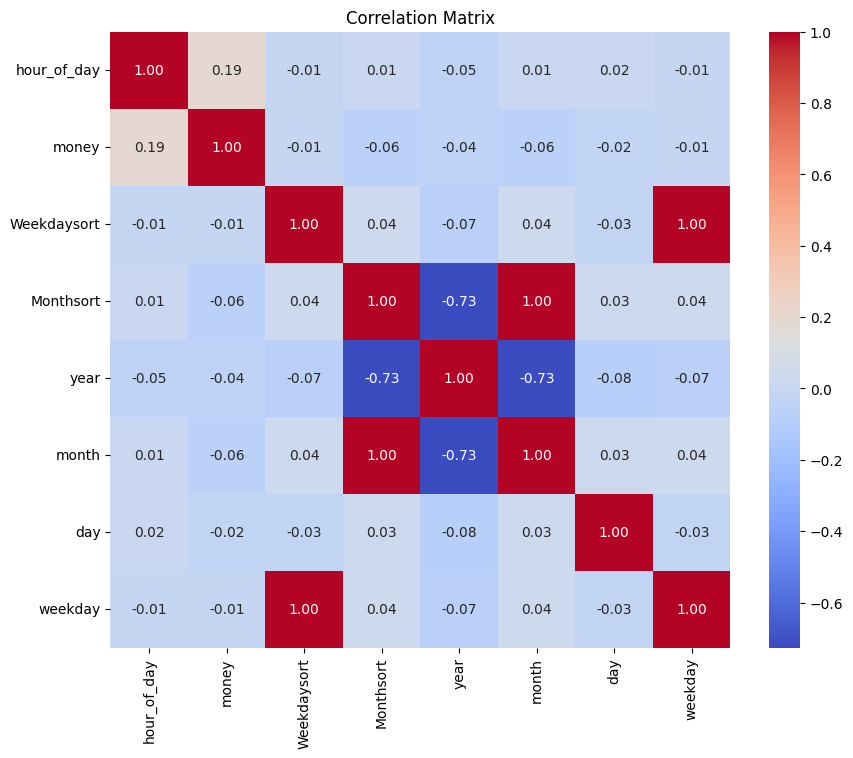

In [ ]:
# Correlation matrix
corr = df[['hour_of_day', 'money', 'Weekdaysort', 'Monthsort', 'year', 'month', 'day', 'weekday']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 8. Sales Forecasting Model Preparation

We will prepare the data for modeling by splitting it into training and testing sets, scaling features, and encoding categorical variables as needed.

In [ ]:
# Define features and target
features = ['hour_of_day', 'Weekdaysort', 'Monthsort', 'year', 'month', 'day', 'weekday']
X = df[features]
y = df['money']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 9. Model Training and Evaluation

We will train different forecasting models such as Linear Regression, Random Forest, and XGBoost. Model performance will be evaluated using RMSE, MAE, and R² metrics.

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


# Evaluation function
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

# Evaluate all models
evaluate(y_test, y_pred_lr, 'Linear Regression')
evaluate(y_test, y_pred_rf, 'Random Forest')

Linear Regression - RMSE: 4.85, MAE: 4.09, R2: 0.04
Random Forest - RMSE: 4.71, MAE: 3.68, R2: 0.10


## 10. Hyperparameter Tuning

We will use grid search to find the optimal hyperparameters for the best performing models to improve prediction accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)
print(f'Best Random Forest Params: {gs_rf.best_params_}')

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Retrain Random Forest with best params
rf_best = RandomForestRegressor(
    max_depth=10,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)
rf_best.fit(X_train_scaled, y_train)
y_pred_rf_best = rf_best.predict(X_test_scaled)
evaluate(y_test, y_pred_rf_best, 'Random Forest (Tuned)')

Random Forest (Tuned) - RMSE: 4.41, MAE: 3.65, R2: 0.21


## 11. Feature Importance Analysis

Let's analyze which features have the most significant impact on sales predictions and discuss the business implications of these findings.

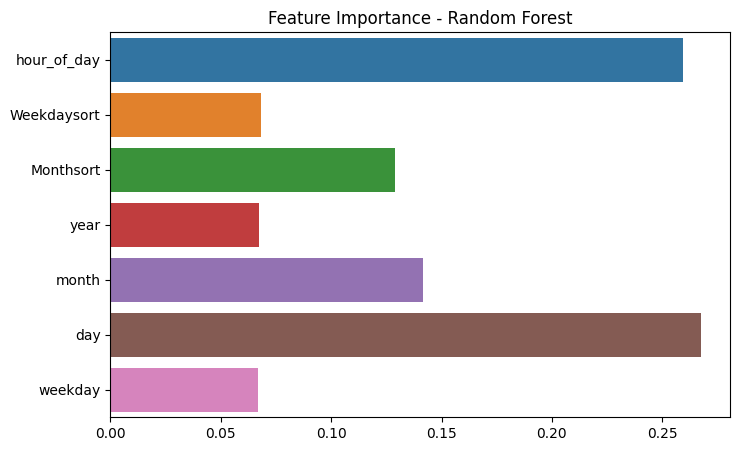

In [ ]:
# Feature importance from Random Forest
importances_rf = rf_best.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances_rf, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()



---

# Conclusion

In this notebook, we performed a comprehensive analysis of the Coffee Store Sales dataset. We explored the data, visualized key sales patterns, engineered useful features, and built several machine learning models for sales forecasting. After evaluating and tuning the models, we identified the most important features influencing sales. These insights can help coffee store managers make data-driven decisions to optimize sales and operations.


If you found this notebook useful, please consider upvoting it.